In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

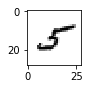

In [5]:
digit = plt.imread('./exercise/data/5/5_10.bmp')

# digit黑白
plt.figure(figsize=(1,1))
plt.imshow(digit,cmap = 'gray')

In [6]:
data = []
target = []
for i in range(10):
    for j in range(1,501):
        digit = plt.imread('./exercise/data/%d/%d_%d.bmp'%(i,i,j))
        data.append(digit)
        
#         目标值
        target.append(i)

In [8]:
# 转化成ndarray
X = np.array(data)

y = np.array(target)

In [9]:
# 三维数据，不能交给算法，进行学习
# [[样本一特征],[样本二特征]]
# [[[]]]
X.shape

(5000, 28, 28)

In [10]:
y.shape

(5000,)

In [13]:
y[:600]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
28*28

784

In [15]:
# reshape可以不改变数据，形状改变
X = X.reshape(5000,784)
# 5000个样本，每个样本784个像素，每个像素当成属性
X.shape

(5000, 784)

In [16]:
# 划分训练数据和测试数据
from sklearn.model_selection import train_test_split

In [18]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
a = np.arange(10)

b = np.arange(-10,0)

display(a,b)
# 打乱顺序，并且将数据进行划分
train_test_split(a,b,test_size = 0.3)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1])

[array([2, 9, 8, 4, 6, 5, 0]),
 array([3, 7, 1]),
 array([ -8,  -1,  -2,  -6,  -4,  -5, -10]),
 array([-7, -3, -9])]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1 )

In [26]:
X_train.shape

(4500, 784)

In [27]:
y_train.shape

(4500,)

In [28]:
y_test

array([2, 6, 6, 4, 4, 2, 2, 0, 9, 4, 2, 7, 5, 7, 2, 6, 3, 3, 7, 2, 5, 8,
       7, 3, 1, 6, 9, 9, 2, 3, 8, 8, 7, 1, 5, 3, 6, 7, 2, 7, 7, 0, 5, 7,
       5, 1, 5, 4, 0, 3, 4, 1, 3, 4, 0, 6, 9, 4, 3, 3, 8, 1, 5, 4, 7, 7,
       6, 8, 1, 2, 2, 4, 4, 9, 2, 5, 3, 8, 3, 5, 9, 0, 9, 3, 8, 6, 2, 6,
       6, 6, 0, 1, 7, 5, 4, 0, 0, 9, 0, 4, 0, 7, 9, 7, 9, 0, 5, 5, 3, 0,
       4, 8, 7, 7, 4, 7, 0, 0, 6, 0, 4, 4, 3, 8, 9, 2, 2, 4, 2, 6, 6, 0,
       2, 9, 8, 7, 0, 3, 7, 0, 8, 4, 7, 4, 9, 2, 2, 4, 4, 9, 8, 4, 2, 4,
       3, 9, 0, 5, 8, 0, 6, 2, 6, 0, 2, 7, 4, 1, 4, 7, 1, 2, 2, 8, 1, 3,
       6, 7, 0, 5, 2, 4, 1, 9, 0, 0, 4, 7, 0, 3, 8, 8, 9, 1, 1, 8, 0, 3,
       4, 4, 3, 9, 9, 8, 4, 9, 1, 4, 4, 1, 4, 6, 4, 3, 1, 6, 9, 2, 4, 5,
       2, 0, 6, 7, 3, 8, 4, 6, 7, 9, 1, 7, 7, 0, 1, 0, 2, 0, 6, 9, 9, 4,
       1, 6, 7, 1, 6, 2, 4, 0, 6, 7, 7, 1, 7, 0, 3, 4, 4, 9, 5, 9, 2, 1,
       1, 0, 4, 6, 6, 9, 5, 5, 2, 1, 7, 7, 5, 0, 1, 7, 8, 4, 1, 5, 5, 9,
       9, 3, 9, 5, 0, 5, 3, 9, 6, 0, 2, 6, 9, 5, 1,

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

y_ = knn.predict(X_test)

(y_ == y_test).mean()

0.952

In [31]:
# 邻居数量给奇数
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)

y_ = knn.predict(X_test)

(y_ == y_test).mean()

0.916

In [32]:
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')

# 4500个数字
knn.fit(X_train,y_train)

y_ = knn.predict(X_test)

(y_ == y_test).mean()

0.958

In [33]:
# 将算法保存一下
from sklearn.externals import joblib

In [34]:
# model模型
joblib.dump(knn,'./digit_recognize.m')

['./digit_recognize.m']

In [35]:
digit_detector = joblib.load('./digit_recognize.m')
digit_detector

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [36]:
# y_预测值，真实值y_test
y_ = digit_detector.predict(X_test[:100])

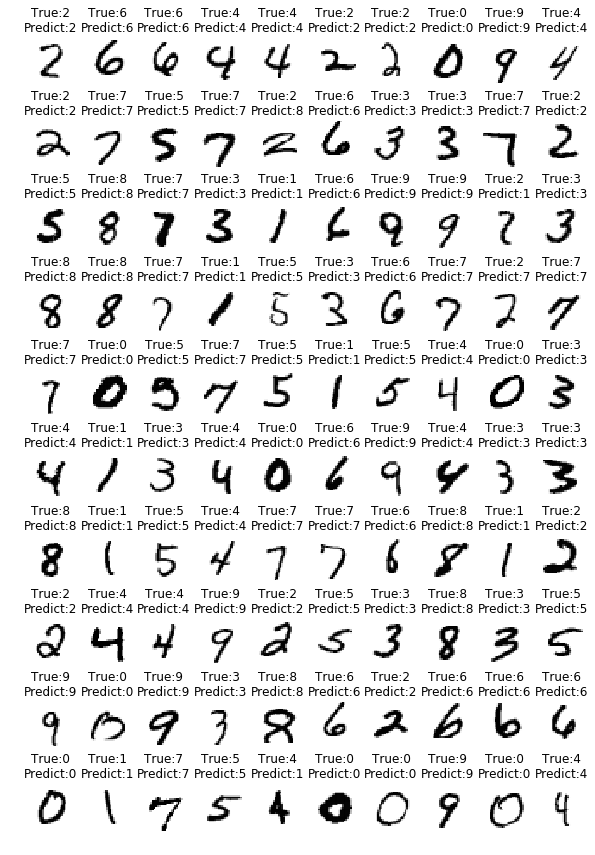

In [39]:
plt.figure(figsize=(1*10,1.5*10))
for i in range(100):
    
#     10行10列
    axes = plt.subplot(10,10,1 + i)
#     画数字，X_test，数据
    axes.imshow(X_test[i].reshape(28,28),cmap = 'gray')
    
#     真实数字y_test中
    t = y_test[i]
#     预测y_
    p = y_[i]
#     标题
    axes.set_title('True:%d\nPredict:%d'%(t,p))
    axes.axis('off')

In [37]:
X_test.shape

(500, 784)